# Instructions
Write a program that uses [the annual Canadian lynx trappings data][1] and reports total lynx trappings by decade (ten years), sorted in the reverse order (most “productive” decade first). The program should download the data file into the cache directory—but only if the file is not in the cache yet. If the directory doesn’t exist, it will be created. The program should save the results as a CSV file in the directory doc . If the directory doesn’t exist, it will be created.

[1]: vincentarelbundock.github.io/Rdatasets/csv/datasets/lynx.csv

In [159]:
# Initial imports
import os
import urllib
import traceback
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

%matplotlib inline

In [160]:
# Dowload the data
data_uri = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/lynx.csv"
msg = "The data file was successfully downloaded."
file_path = "./cache/lynx.csv"

try:
    if not os.path.exists("./cache"):
        os.makedirs("./cache")

    if not os.path.exists(file_path):
        urllib.request.urlretrieve(data_uri, file_path)
    else:
        msg = "The data file already exists."
except:
    print ("There was an error while downloading the data file: %s" % traceback.format_exc())
else:
    print (msg)

The data file already exists.


In [161]:
# Load the data and print some data stats
lynx_data = pd.read_csv(file_path)

In [162]:
print ("Number of records: %r" % len(lynx_data))
lynx_data.head(10)

Number of records: 114


,Unnamed: 0,time,lynx
0,1,1821,269
1,2,1822,321
2,3,1823,585
3,4,1824,871
4,5,1825,1475
5,6,1826,2821
6,7,1827,3928
7,8,1828,5943
8,9,1829,4950
9,10,1830,2577


In [163]:
# Reshape the data frame
lynx_data.columns = ['id', 'year', 'lynx_count']

In [164]:
lynx_data.set_index("id").head(10)

,year,lynx_count
id,,
1,1821,269
2,1822,321
3,1823,585
4,1824,871
5,1825,1475
6,1826,2821
7,1827,3928
8,1828,5943
9,1829,4950


In [165]:
# Create data bins for the decades
lynx_data.year.min()

1821

In [166]:
lynx_data.year.max()

1934

In [167]:
lynx_data['decade'] = 0

In [168]:
lynx_data.head()

,id,year,lynx_count,decade
0,1,1821,269,0
1,2,1822,321,0
2,3,1823,585,0
3,4,1824,871,0
4,5,1825,1475,0


In [169]:
def get_decade(year):
    """This function gets the decade of a given year."""
    dec = int(int(str(year)[-2:])/10)
    res = str(year)[:2] + str(dec) + '0'    
    return int(res)

In [170]:
lynx_data.dtypes

id            int64
year          int64
lynx_count    int64
decade        int64
dtype: object

In [171]:
lynx_data['decade'] = [get_decade(yr) for yr in lynx_data['year']]

In [172]:
lynx_data.head(10)

,id,year,lynx_count,decade
0,1,1821,269,1820
1,2,1822,321,1820
2,3,1823,585,1820
3,4,1824,871,1820
4,5,1825,1475,1820
5,6,1826,2821,1820
6,7,1827,3928,1820
7,8,1828,5943,1820
8,9,1829,4950,1820
9,10,1830,2577,1830


In [173]:
# Grouping by decade
lynx_data_decade = lynx_data.groupby('decade').sum()

In [174]:
lynx_data_decade.drop(lynx_data_decade.columns[[0, 1]], axis = 1, inplace = True)

In [175]:
# The final result
lynx_data_decade.sort_values("lynx_count", ascending=False, inplace=True)

In [176]:
lynx_data_decade

,lynx_count
decade,
1900,25578
1820,21163
1910,19410
1860,18183
1830,14273
1880,13730
1920,13360
1850,12091
1890,10336


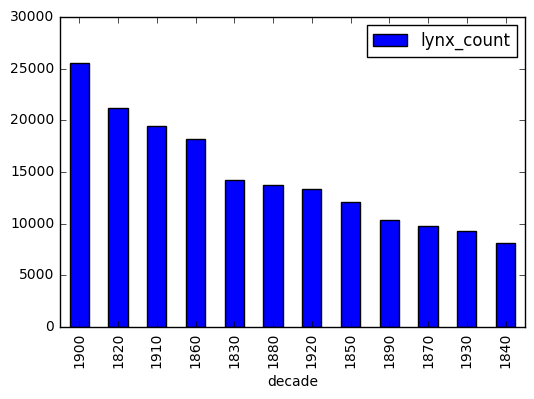

In [177]:
lynx_data_decade.plot(kind='bar')

In [178]:
# Save the data file
if not os.path.exists("./doc"):
    os.makedirs("./doc")
lynx_data_decade.to_csv("./doc/lynx_results.csv")